# Non-Graded Challenge Inferential


## Soal
- Lakukan hypothesis testing terhadap dataset diatas.
- Ambil kesimpulan dari hasil analisa.


## Objective
- Mencari Hipothesis untuk **1 sample 1 tail** melibatkan **rata-rata kematian baru 2020 di Jawa tengah** dan **rata-rata kematian baru 2021 di Jawa tengah** 

- Mencari Hipothesis untuk **1 sample 2 tail** melibatkan **rata-rata kematian baru 2020 di Jawa tengah** dan **rata-rata kematian baru 2021 di jawa tengah**

- Two Samples Independent Two Tailed Hypothesis Testing **rata-rata kematian baru Jawa tengah** dan **rata-rata kematian baru jawa Barat**

- mencari hipothesis untuk **ANOVA**  melibatkan antar pulau atau pada kolom **Kalimantan,Sumatra,Bali** dengan **New Cases**


## Import Libraries

In [89]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(12)
pd.set_option('display.max_columns', 500)

# Data Retrieve

In [90]:
df_covid = pd.read_csv('./data/covid_19_indonesia_time_series_all.csv')
df_copy = df_covid.copy()
df_covid

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,93,Province,NaN,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,92,Province,NaN,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,36,Province,NaN,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,95,Province,NaN,Sumatera Utara,Indonesia,Asia,Sumatera,UTC+07:00,NaN,25,8.0,450,693.0,5417.0,72981,14874889,203.82,99.051964,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


convert **Date** menjadi date time data type

In [91]:
df_covid['Date'] = pd.to_datetime(df_covid['Date'], format='%m/%d/%Y')
df_covid[df_covid['Date'] < '2020-12-01']

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.00
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,2020-03-02,ID-RI,Riau,1,0,0,1,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8928,2020-11-30,ID-SG,Sulawesi Tenggara,1,1,138,-138,6503,106,4994,1403,Province,NaN,Sulawesi Tenggara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,15,2.0,219,377.0,1911.0,38068,2635461,69.23,122.070311,-4.124689,0.38,2467.50,0.38,40.22,4.02,1.63%,76.80%,0.02,0.33
8929,2020-11-30,ID-SA,Sulawesi Utara,115,3,69,43,6926,244,5361,1321,Province,NaN,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,43.53,2621.61,1.14,92.36,9.24,3.52%,77.40%,6.39,1.00
8930,2020-11-30,ID-SB,Sumatera Barat,92,7,216,-131,20041,414,17821,1806,Province,NaN,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,16.67,3631.11,1.27,75.01,7.50,2.07%,88.92%,0.34,2.33
8931,2020-11-30,ID-SS,Sumatera Selatan,35,5,48,-18,9463,507,7659,1297,Province,NaN,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,4.26,1151.56,0.61,61.70,6.17,5.36%,80.94%,0.85,2.50


## Data Cleaning

In [92]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         21759 non-null  datetime64[ns]
 1   Location ISO Code            21759 non-null  object        
 2   Location                     21759 non-null  object        
 3   New Cases                    21759 non-null  int64         
 4   New Deaths                   21759 non-null  int64         
 5   New Recovered                21759 non-null  int64         
 6   New Active Cases             21759 non-null  int64         
 7   Total Cases                  21759 non-null  int64         
 8   Total Deaths                 21759 non-null  int64         
 9   Total Recovered              21759 non-null  int64         
 10  Total Active Cases           21759 non-null  int64         
 11  Location Level               21759 non-nu

there is a lot of missing values

### Drop Column



Drop this columns and reason why : 
- **Country** , because it's only have 'Indonesia' on its values
- **Continent**, because continent only have 'Asia' on its values
- **Daerah khusus** , because there is no relevant values
- **City or Regency** , because columns have no data 
- **Latitude** and **Longitude** it has no relevant
- **Total Urban Villages** not relevant
- **Total Rural Villages** not relevant
- **Growth Factor of New Cases**, not relevant
- **Growth Factor of New Deaths**, not relevant

In [93]:
df_covid.drop(columns=['City or Regency','Time Zone','Special Status','Country','Continent','Longitude','Latitude','Total Rural Villages','Total Urban Villages','Growth Factor of New Cases','Growth Factor of New Deaths'],inplace=True)



hilangkan value **'Indonesia'**

In [94]:
df_covid = df_covid.query("Location != 'Indonesia'")

## Implementasi

### 1
 Mencari Hipothesis untuk **1 sample 1 tail**  **rata-rata kematian baru 2020 di Jawa tengah** lebih kecil dari **rata-rata kematian baru 2021 di Jawa tengah**  jika rata2 tahun lalu kematian baru adalah 12

**H0: μ <= 12** <br>
**H1: μ > 12**

In [107]:
df_jateng = df_covid.query("Province == 'Jawa Tengah'")[['Date','New Deaths']].groupby('Date').sum()
df_jateng_2020 = df_covid.query("Province == 'Jawa Tengah' & Date <= '2020-12-30'")[['Date','New Deaths']].groupby('Date').sum()
print('Average New Deaths a day is ', np.round(df_jateng['New Deaths'].mean()))
print('Average New Deaths last year a day is ', np.round(df_jateng_2020['New Deaths'].mean()))

Average New Deaths a day is  48.0
Average New Deaths last year a day is  12.0


In [98]:
df_jateng

,New Deaths
Date,
2020-03-08,1
2020-03-09,0
2020-03-10,0
2020-03-11,1
2020-03-12,0
...,...
2021-11-28,0
2021-11-29,4
2021-11-30,1




Mencari `p_val` menggunakan `stats.ttest_1samp` 

In [111]:
p_stat,p_val = stats.ttest_1samp(df_jateng['New Deaths'],12)
print('P-value:',(p_val/2)) #The p-value divided by 2 since the output is two-sided p-value

P-value: 8.565998953029148e-22


c:\Users\ajies\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


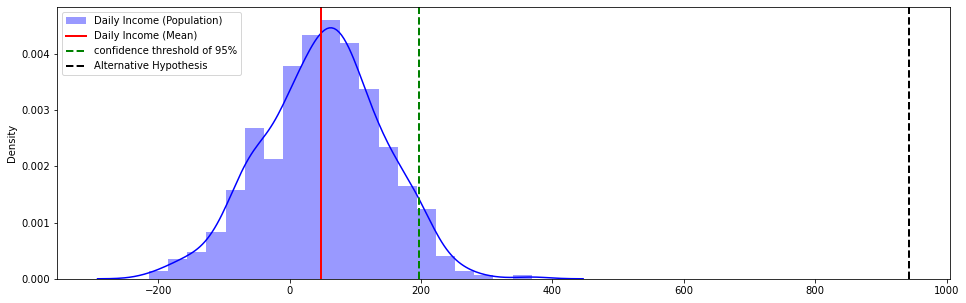

In [115]:
daily_newDeaths_pop = np.random.normal(df_jateng['New Deaths'].mean(), df_jateng['New Deaths'].std(), 500)

ci = stats.norm.interval(0.90, df_jateng['New Deaths'].mean(), df_jateng['New Deaths'].std())

plt.figure(figsize=(16,5))
sns.distplot(daily_newDeaths_pop, label='Daily New Deaths(Population)', color='blue')
plt.axvline(df_jateng['New Deaths'].mean(), color='red', linewidth=2, label='Daily New Deaths (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(daily_newDeaths_pop.mean() + p_stat*daily_newDeaths_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

### 2 
 Mencari Hipothesis untuk **1 sample 1 tail**  **rata-rata kematian baru 2020 di Jawa tengah** lebih kecil dari **rata-rata kematian baru 2021 di Jawa tengah**  jika rata2 tahun lalu kematian baru adalah 12

hipotesisnya adalah<br>

**H0: μ = 12**

**H1: μ != 12**

In [118]:
t_stat,p_val = stats.ttest_1samp(df_jateng['New Deaths'], 12)
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 1.7131997906058297e-21
t-statistics: 9.875950996013346


c:\Users\ajies\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


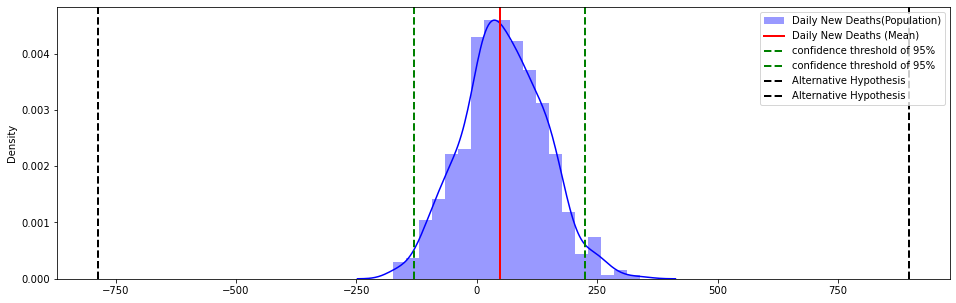

In [120]:
daily_newDeaths_pop = np.random.normal(df_jateng['New Deaths'].mean(), df_jateng['New Deaths'].std(), 500)

ci = stats.norm.interval(0.95, df_jateng['New Deaths'].mean(), df_jateng['New Deaths'].std())

plt.figure(figsize=(16,5))
sns.distplot(daily_newDeaths_pop, label='Daily New Deaths(Population)', color='blue')
plt.axvline(df_jateng['New Deaths'].mean(), color='red', linewidth=2, label='Daily New Deaths (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(daily_newDeaths_pop.mean() + p_stat*daily_newDeaths_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(daily_newDeaths_pop.mean() - p_stat*daily_newDeaths_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')

plt.legend()

### 3 
Two Samples Independent Two Tailed Hypothesis Testing **rata-rata kematian baru Jawa tengah** dan **rata-rata kematian baru jawa Barat**

Hipotesis nya adalah : <br>

**H0: μ_Jawa Tengah = μ_Jawa Barat**<br>
**H1: μ_Jawa Tengah != μ_Jawa Barat**

In [122]:
df_jateng
df_jabar= df_covid.query("Province == 'Jawa Barat'")[['Date','New Deaths']].groupby('Date').sum()

print('Average Daily New Deaths Jawa Barat :',format(np.round(df_jabar['New Deaths'].mean())))
print('Average Daily New Deaths Jawa Tengah :',format(np.round(df_jateng['New Deaths'].mean())))

Average Daily New Deaths Jawa Barat : 23.0
Average Daily New Deaths Jawa Tengah : 48.0


In [123]:
t_stat, p_val = stats.ttest_ind(df_jateng,df_jabar)
print('P-value:',p_val[0]) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat[0])

P-value: 2.535384919956709e-09
t-statistics: 6.002153589342701


c:\Users\ajies\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ajies\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


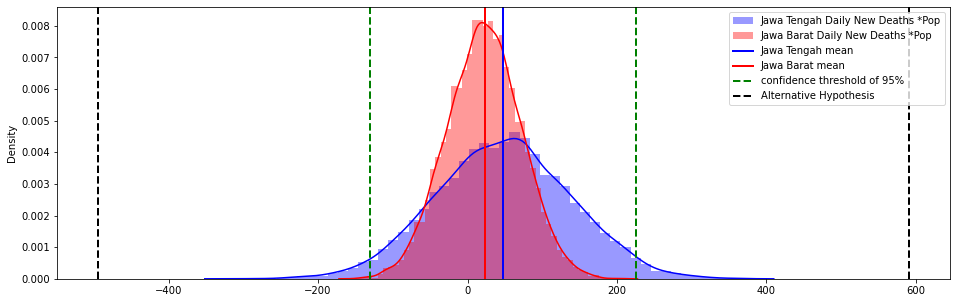

In [124]:
france_pop = np.random.normal(df_jateng['New Deaths'].mean(),df_jateng['New Deaths'].std(),10000)
germany_pop = np.random.normal(df_jabar['New Deaths'].mean(),df_jabar['New Deaths'].std(),10000)

ci = stats.norm.interval(0.95, df_jateng['New Deaths'].mean(), df_jateng['New Deaths'].std())
plt.figure(figsize=(16,5))
sns.distplot(france_pop, label='Jawa Tengah Daily New Deaths *Pop',color='blue')
sns.distplot(germany_pop, label='Jawa Barat Daily New Deaths *Pop',color='red')

plt.axvline(df_jateng['New Deaths'].mean(), color='blue', linewidth=2, label='Jawa Tengah mean')
plt.axvline(df_jabar['New Deaths'].mean(), color='red',  linewidth=2, label='Jawa Barat mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(france_pop.mean()+t_stat[0]*france_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(france_pop.mean()-t_stat[0]*france_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

### 4
mencari hipothesis untuk **ANOVA**  melibatkan antar pulau atau pada kolom **Kalimantan,Sumatra,Bali** dengan **New Cases**

In [135]:
kalimantan_nc = df_covid.query("Island == 'Kalimantan'").groupby('Date').sum()['New Cases']
sumatra_nc = df_covid.query("Island == 'Sumatera'").groupby('Date').sum()['New Cases']
jawa_nc = df_covid.query("Island == 'Jawa'").groupby('Date').sum()['New Cases']

print("daily average of new cases in Kalimantan : ",kalimantan_nc.mean())
print("daily average of new cases in Sumatra : ",sumatra_nc.mean())
print("daily average of new cases in Bali : ",jawa_nc.mean())



# df_covid['Island'].unique()

daily average of new cases in Kalimantan :  558.3704292527822
daily average of new cases in Sumatra :  985.6599063962559
daily average of new cases in Bali :  4279.292834890965


In [138]:
f_stat,p_value = stats.f_oneway(kalimantan_nc,sumatra_nc,jawa_nc)

print('P-value:',p_value)

P-value: 2.06656706348806e-70


`P_Value` is below **0.05** maka kita menolak **Hipotesis Null** dan dari pulau Kalimantan,Sumatra,Jawa memiliki kasus covid-19 yang sangat signivikan  